# Lecture 3 Exploratory Data Analysis
__MATH 3480__ - Dr. Michael Olson

In Exploratory Data Analysis, we need to follow these steps:
1. Obtain and Clean the Data
2. Wrangle the Data
3. Look at statistical calculations
4. Graph the data 
5. Draw conclusions and make hypotheses from (3) and (4), looking for relationships that we might use

|              | Quantitative Data | Categorical Data |
| :----------- | :---------------- | :--------------- |
| Calculations | Mean, Mode<br>5-summary Statistics<br>Distributions (count, standard deviation/variance) | Probabilities<br>Expected Values<br>Probability/Binomial/etc. Distributions |
| Graphs       | Histogram/KDE (kernel density estimator)<br>Boxplot/Violinplot<br>Scatterplot<br>Timeseries<br>Heatmap | Barplot<br>Pie Chart<br>Venn Diagram<br>Tree Diagram |

The goal of EDA:
* Derive Insights
* Generate Hypotheses

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Data Validation
Look through the data for
* Missing values
* Incorrect data types (is the year an integer or a float? Is the weight a float or a string?)
* Incorrect categories (is the origin 'usa' or 'uas'?)
* Patterns

In [ ]:
mpg.info()

In [ ]:
# Missing Values
mpg.isna().sum()

In [ ]:
# Check Data Types
mpg.dtypes

In [ ]:
# Incorrect Categories
mpg['origin'].unique()

In [ ]:
mpg['origin'].isin(['usa','japan','europe'])

In [ ]:
( ~mpg['origin'].isin(['usa','japan','europe']) ).sum()

In [ ]:
# Looking for patterns

### Groupby Origin

# mpg.groupby('origin').mean() # Error because it doesn't know what to do with 'name' column
mpg.drop('name', axis=1).groupby('origin').mean()

In [ ]:
### Groupby Model Year
mpg.drop(['name','origin'], axis=1).groupby('model_year').mean()

In [ ]:
### Groupby both Origin and Model Year
mpg.drop('name', axis=1).groupby(['origin','model_year']).mean()

## Calculations

### Quantitative Calculations

In [ ]:
mpg.info()

In [ ]:
mpg.describe()

### Categorical Calculations

In [ ]:
mpg['origin'].value_counts()

## Graphing
Below are some of the common graphs that we make. Use these graphs to find patterns within the data.

### Categorical plots
Countplots, Barplots, pie charts

#### Countplot

In [ ]:
sns.countplot(data=mpg, x='origin')
#plt.title('Count of cars by origin country')
plt.xlabel('')

#### Bar Graph

In [ ]:
sns.barplot(data=mpg, x='origin', y='mpg', errorbar=('ci',90))
plt.title('Gas Mileage by Country of Origin')
plt.xlabel('')
plt.ylabel('Gas Mileage (miles per gallon)')

#### Pie Chart

In [ ]:
origin_counts = mpg['origin'].value_counts()
print(origin_counts)

In [ ]:
plt.pie(origin_counts, labels=origin_counts.index, autopct='%.1f%%') 

### Quantitative Plots
Histograms, KDE plots, Boxplots, Violinplots, Scatterplots, Regression plots, Timeseries, Heatmap

#### Histogram

In [ ]:
sns.histplot(data=mpg, x='mpg', binwidth=5)

In [ ]:
sns.histplot(data=mpg, y='horsepower', bins=10)

#### KDE (Kernel Density Estimator)
* The height of the curve is the *likelihood* of a particular value being selected
* The area under the curve is the *probability* of a particular value being within a range
* The total area under a KDE is 1

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

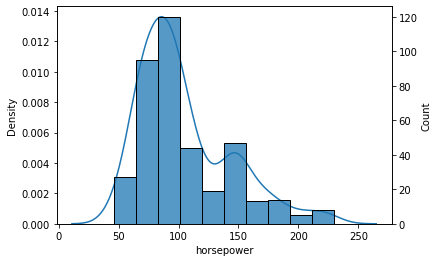

In [23]:
fig,ax = plt.subplots()
sns.kdeplot(data=mpg, x='horsepower', ax=ax)
ax2 = plt.twinx(ax)
sns.histplot(data=mpg, x='horsepower', bins=10, ax=ax2)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

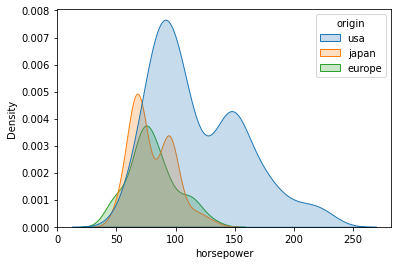

In [22]:
sns.kdeplot(data=mpg, x='horsepower', hue='origin', shade=True)

When we break up a KDE by a category, the area under each KDE is going to be less than 1, but the sum of all areas will equal 1.

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

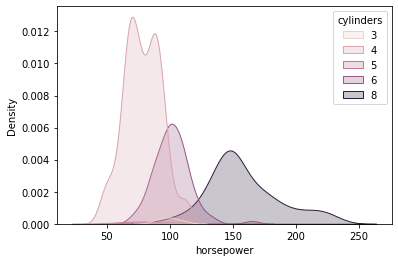

In [21]:
sns.kdeplot(data=mpg, x='horsepower', hue='cylinders', shade=True)

In [ ]:
sns.kdeplot(data=mpg, x='mpg', hue='cylinders')

#### Boxplot

In [ ]:
sns.boxplot(data=mpg, x='mpg', y='origin')
plt.title('Gas Mileage by Origin Country')
plt.xlabel('Gas Mileage (miles per gallon)')
plt.ylabel('')

#### Violinplot

In [ ]:
sns.violinplot(data=mpg, x='mpg', y='origin')
plt.title('Distribution of Gas Mileage by Origin Country')
plt.xlabel('Gas Mileage (miles per gallon)')
plt.ylabel('')

#### Scatterplot

In [ ]:
sns.scatterplot(data=mpg, x='mpg', y='horsepower', hue='origin')
plt.title('Comparison of Gas Mileage with Engine Power')
plt.xlabel('Gas Mileage (miles per gallon)')
plt.ylabel('Engine Power (horsepower)')

#### Regression Plot

In [ ]:
sns.regplot(data=mpg, x='horsepower', y='weight', ci=90)

In [ ]:
# No hue option
fig,ax = plt.subplots()
for origin in mpg['origin'].unique():
    sns.regplot(data=mpg[mpg['origin'] == origin], x='horsepower', y='weight', label=origin)

plt.legend()

In [ ]:
mpg.groupby('origin').max()

#### 2-D KDE plot

<AxesSubplot:xlabel='Density', ylabel='horsepower'>

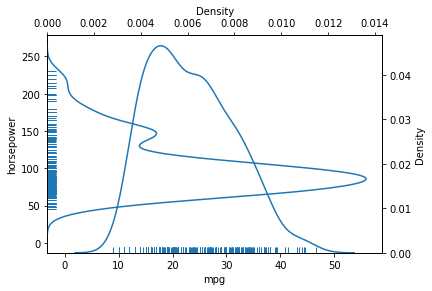

In [15]:
fig,ax = plt.subplots()

sns.rugplot(data=mpg, x='mpg', y='horsepower', ax=ax)

ax2 = ax.twinx()
sns.kdeplot(data=mpg, x='mpg', ax=ax2)

ax3 = ax.twiny()
sns.kdeplot(data=mpg, y='horsepower', ax=ax3)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

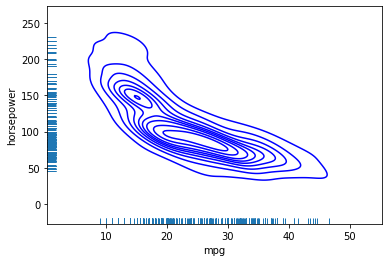

In [18]:
fig,ax = plt.subplots()

sns.rugplot(data=mpg, x='mpg', y='horsepower', ax=ax)
sns.kdeplot(data=mpg, x='mpg', y='horsepower', ax=ax, shade=False, color='blue')

#### Pairplot

In [ ]:
sns.pairplot(data=mpg, hue='cylinders')

#### Jointplot

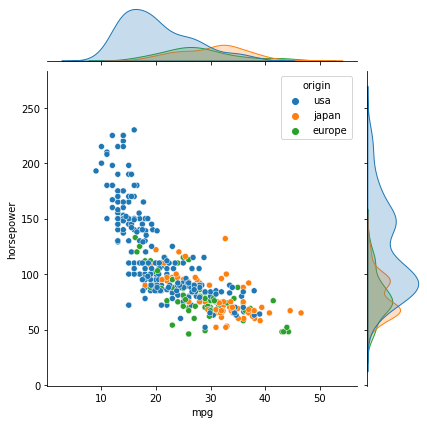

In [26]:
sns.jointplot(data=mpg, x='mpg', y='horsepower', hue='origin')

#### Timeseries

In [ ]:
sns.lineplot(data=mpg, x='model_year', y='mpg', hue='origin')
plt.legend()
plt.title('Gas Mileage over Time by Country of Origin')
plt.xlabel('Model Year\n(76 = 1976)')
plt.ylabel('Gas Mileage (miles per gallon)')

#### Heatmap

In [ ]:
# Create table of the model year and origin, with the average mpg as values
car_by_year = mpg.drop('name', axis=1).pivot_table(columns='model_year', index='origin', values='mpg', aggfunc='mean')

plt.figure(figsize=(10,3))
sns.heatmap(data=car_by_year) 

plt.title('Gas Mileage over Time by Country of Origin')
plt.xlabel('Model Year\n(76 = 1976)')
plt.ylabel('')